## Imports

In [ ]:
pip install wordcloud adjustText

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from adjustText import adjust_text

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import plotly.figure_factory as ff
import numpy as np
import hashlib
import csv
import pickle

from sklearn.metrics.pairwise import cosine_similarity
from datasketch import MinHash, MinHashLSH

import re
from nltk.tokenize import word_tokenize
import os
from gensim.models import Word2Vec
import networkx as nx
from pyvis.network import Network
from scipy.spatial.distance import cosine
import plotly.express as px
import webbrowser

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

## Data Analysis

  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
    lan_code  frequency
0        eng    1586621
1        rus     909951
2        ita     805104
3        tur     717897
4        epo     685643
..       ...        ...
399      ssw          1
400      urh          1
401      lou          1
402      rel          1
403      hax          1

[404 rows x 2 columns]


C:\Users\saver\AppData\Local\Temp\ipykernel_15748\2213813112.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


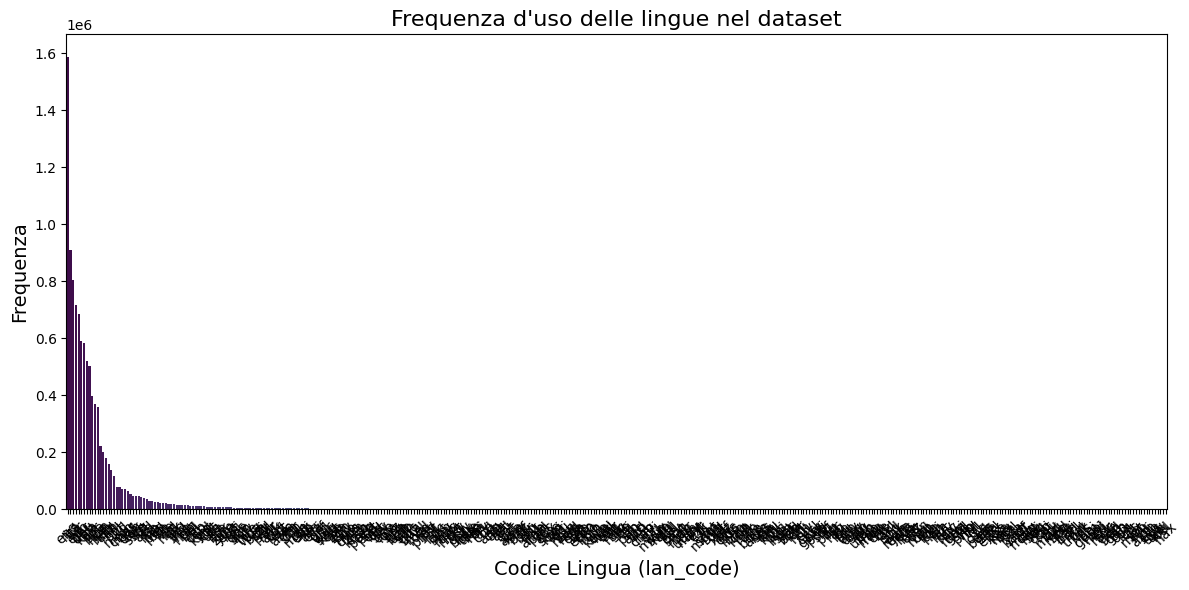

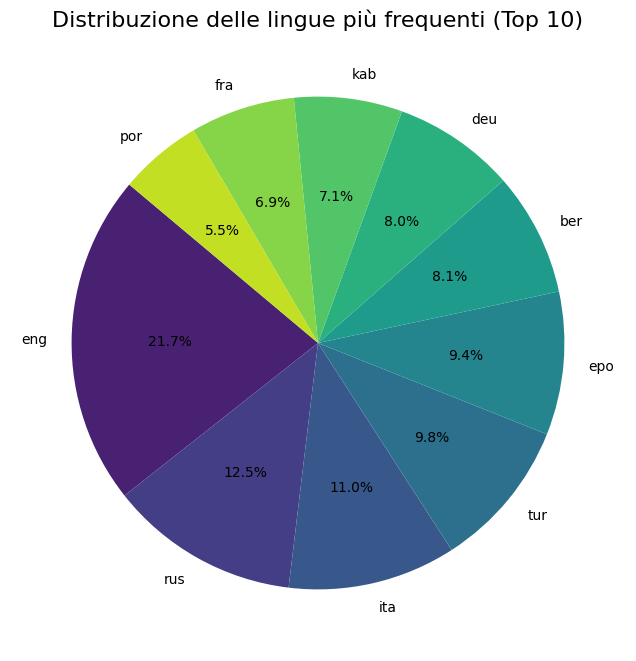

In [2]:
# Caricare il dataset
file_path = 'data/sentences.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

Nuovo file CSV salvato in: data/filtered_language_detection.csv
Dimensione del nuovo dataset: 10041510 righe (su 10341812 totali).
  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
   lan_code  frequency
0       eng    1586621
1       rus     909951
2       ita     805104
3       tur     717897
4       epo     685643
5       ber     591222
6       deu     584674
7       kab     518328
8       fra     501241
9       por     398029
10      spa     369841
11      hun     357828
12      jpn     220103
13      heb     199203
14      ukr     178269
15      nld     159193
16      fin     139089
17      pol     116582
18      mkd      77949
19      lit      76149
20      cmn      72439
21      mar      69303
22      ces      63880
23      dan      54945
24      tok      47203
25      swe      47006
26      srp      45199
27      lat    

C:\Users\saver\AppData\Local\Temp\ipykernel_15748\1323358416.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


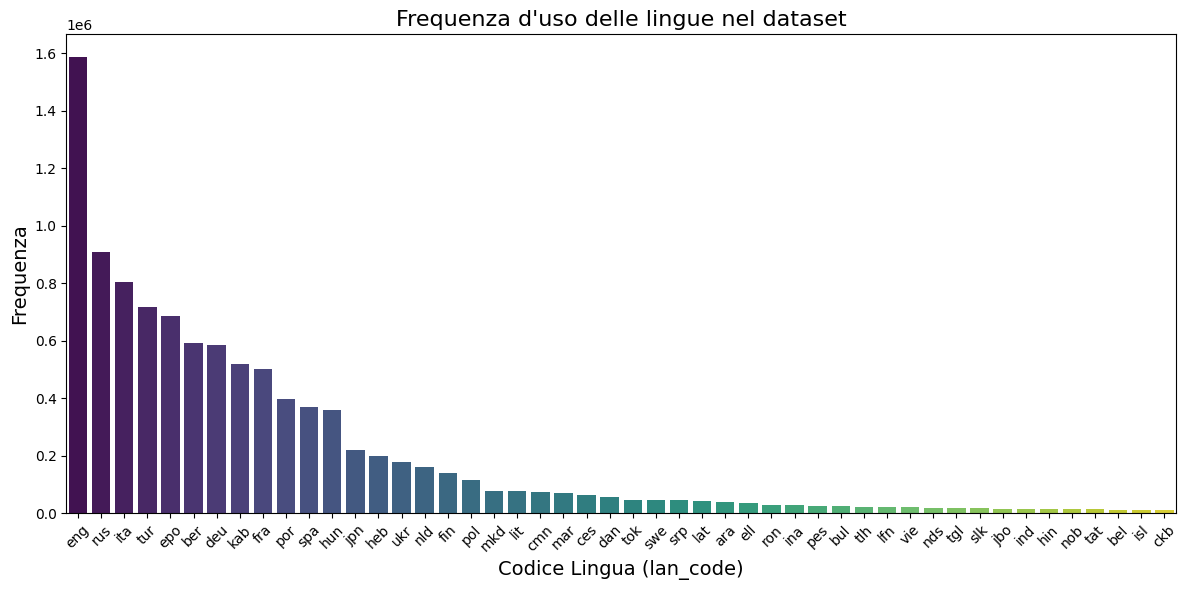

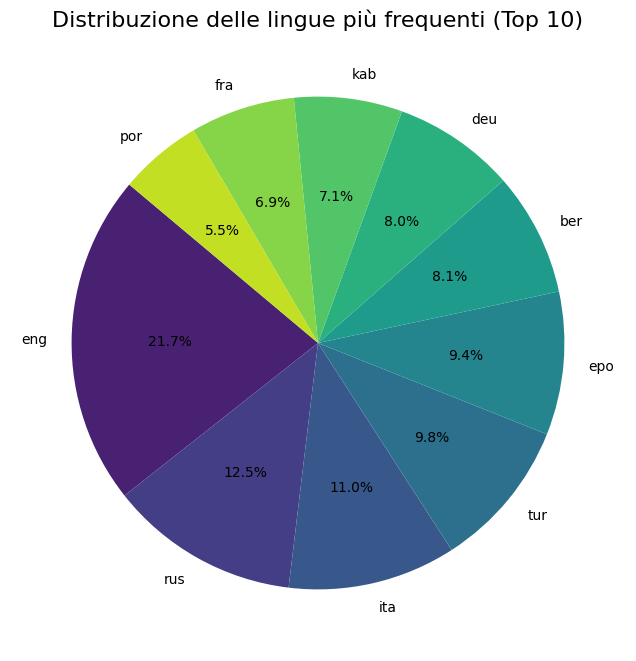

In [3]:
# Calcolare il totale delle righe
total_rows = len(data)

# Calcolare la frequenza delle lingue
language_counts = data['lan_code'].value_counts()

# Filtrare i codici lingua con frequenza >= 0.01% del totale
threshold = 0.001 * total_rows  # 0.01% del totale
valid_languages = language_counts[language_counts >= threshold].index

# Filtrare il dataset mantenendo solo le righe con i codici lingua validi
filtered_data = data[data['lan_code'].isin(valid_languages)]

# Salvare il nuovo dataset in un file CSV
output_path = 'data/filtered_language_detection.csv'  # Sostituisci con il nome desiderato per il file
filtered_data.to_csv(output_path, index=False)

print(f"Nuovo file CSV salvato in: {output_path}")
print(f"Dimensione del nuovo dataset: {len(filtered_data)} righe (su {total_rows} totali).")

file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

In [4]:
# Funzione per estrarre termini unici da una frase
def get_unique_terms(sentence):
    # Tokenizzazione semplice basata sugli spazi, rimozione di punteggiatura e conversione a minuscolo
    if isinstance(sentence, str):
        words = sentence.lower().split()
        return set(words)
    return set()

# Creare un dizionario per conteggiare i termini unici per lingua
unique_terms_per_language = {}

# Iterare per ogni lingua e accumulare termini unici
for lan_code, group in data.groupby('lan_code'):
    all_terms = set()
    for sentence in group['sentence']:
        all_terms.update(get_unique_terms(sentence))
    unique_terms_per_language[lan_code] = len(all_terms)

# Creare un DataFrame per visualizzare i risultati
unique_terms_df = pd.DataFrame(list(unique_terms_per_language.items()), columns=['lan_code', 'unique_terms'])

# Ordinare il DataFrame per numero di termini unici in ordine decrescente
unique_terms_df = unique_terms_df.sort_values(by='unique_terms', ascending=False)

# Stampare le statistiche principali
print(unique_terms_df)

# Salvare i risultati in un file CSV
output_path = 'data/unique_terms_per_language.csv'
unique_terms_df.to_csv(output_path, index=False)

print(f"Risultati salvati in: {output_path}")

   lan_code  unique_terms
36      rus        255924
11      epo        247182
22      jpn        220719
16      hun        214852
45      tur        211054
23      kab        203891
2       ber        201578
8       deu        197008
10      eng        170993
38      spa        128056
13      fra        125321
34      por        121962
20      ita        121699
12      fin        101601
14      heb         99955
6       cmn         76048
33      pol         75483
46      ukr         71530
30      nld         56689
26      lit         52097
39      srp         46588
24      lat         44511
4       ces         44506
0       ara         44422
28      mkd         41441
7       dan         31889
41      tat         29627
27      mar         27588
40      swe         26363
17      ina         25991
35      ron         23956
1       bel         23463
9       ell         23407
3       bul         21865
32      pes         21423
43      tlh         21217
25      lfn         20317
42      tgl 

  lan_code  unique_terms
0      rus        255924
1      epo        247182
2      jpn        220719
3      hun        214852
4      tur        211054


C:\Users\saver\AppData\Local\Temp\ipykernel_15748\158821832.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')


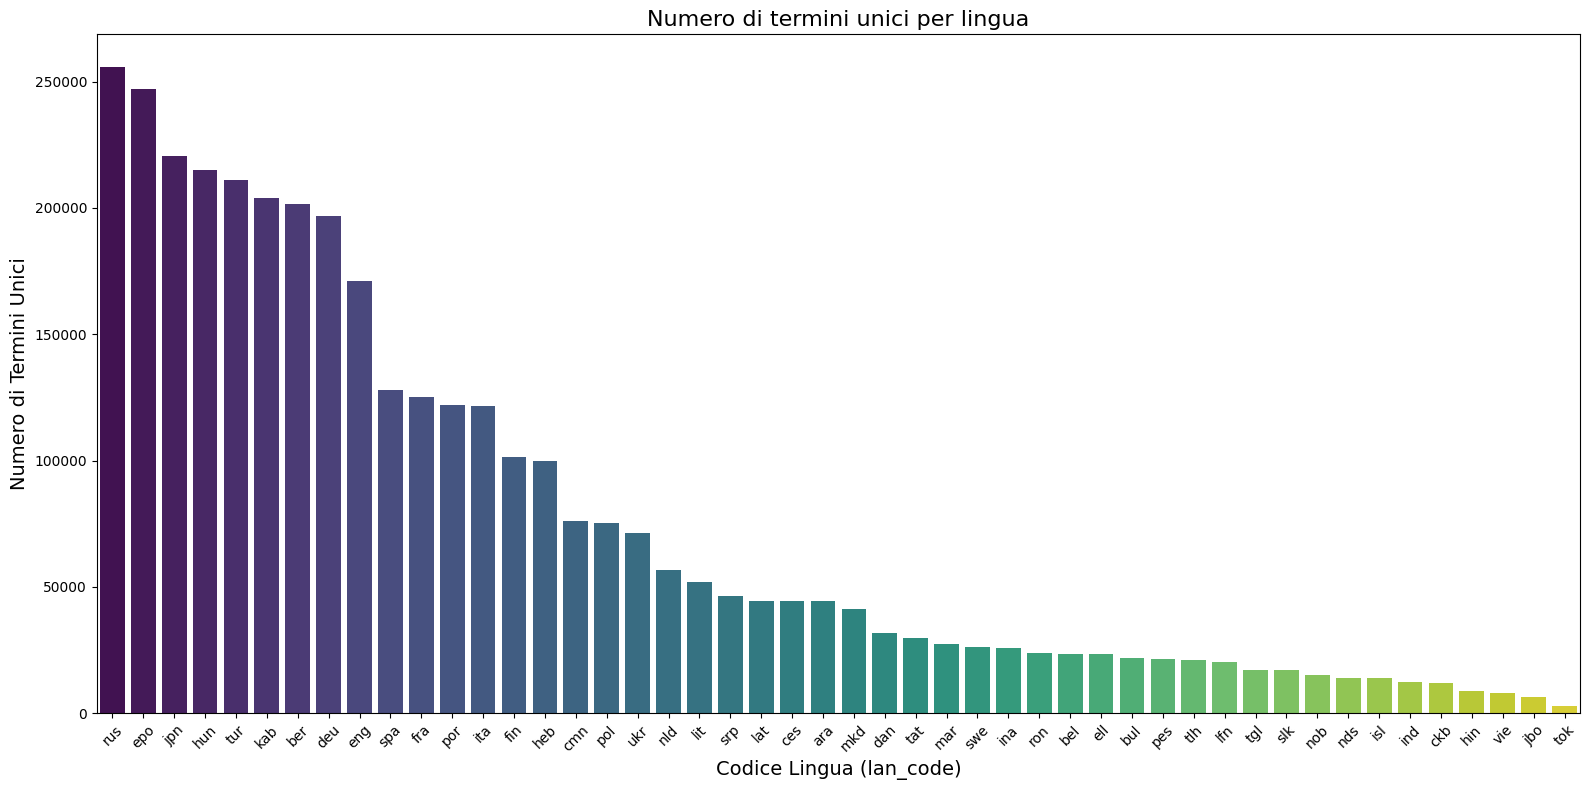

In [5]:
input_path = 'data/unique_terms_per_language.csv'
unique_terms_df = pd.read_csv(input_path)

# Visualizzare i primi risultati
print(unique_terms_df.head())

# Creare il grafico a barre
plt.figure(figsize=(16, 8))
sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')
plt.xticks(rotation=45, fontsize=10)
plt.title('Numero di termini unici per lingua', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Numero di Termini Unici', fontsize=14)
plt.tight_layout()
plt.show()

## TF-IDF

In [2]:
# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000 , lowercase=True)  # Puoi personalizzare max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['sentence'])

# Convertire il risultato in un DataFrame per una migliore visualizzazione
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Visualizzare i primi risultati
print(tfidf_df.head())

# Salvare il TF-IDF in un file CSV
output_path = 'data/tfidf_language_analysis.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF salvato in: {output_path}")

                00       000        10       100        11        12  \
lan_code                                                               
ara       0.000000  0.000325  0.000171  0.000190  0.000061  0.000081   
bel       0.000544  0.000360  0.000650  0.000480  0.000272  0.000360   
ber       0.000596  0.000085  0.000279  0.000149  0.000047  0.000096   
bul       0.000347  0.000420  0.000276  0.000306  0.000043  0.000038   
ces       0.000032  0.000142  0.000230  0.000255  0.000000  0.000028   

                13        14        15        16  ...     ṛebbi     ṛuḥen  \
lan_code                                          ...                       
ara       0.000057  0.000115  0.000057  0.000029  ...  0.000000  0.000000   
bel       0.000250  0.000128  0.000250  0.000130  ...  0.000000  0.000000   
ber       0.000076  0.000038  0.000071  0.000032  ...  0.005564  0.007426   
bul       0.000040  0.000122  0.000120  0.000000  ...  0.000000  0.000000   
ces       0.000059  0.000030  0.0

In [3]:
# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Funzione per rimuovere stop words e punteggiatura
def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  # Ottieni stop words per la lingua specifica
    except:
        stop_words = set()  # Se la lingua non è supportata, nessuna stop word viene usata
    # Tokenizzazione semplice e rimozione di stop words e punteggiatura
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Aggiungere un mapping tra codici lingua e le lingue supportate da NLTK
language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'fra': 'french',
    'spa': 'spanish',
    'deu': 'german',
    'ara': 'arabic',
    'aze': 'azerbaijani',
    'tur': 'turkish',
    'dan': 'danish',
    'fin': 'finnish',
    'ell': 'greek',
    'hun': 'hungarian',
    'ind': 'indonesian',
    'kaz': 'kazakh',
    'npi': 'nepali',
    'nob': 'norwegian',
    'rom': 'romanian',
    'por': 'portuguese',
    'rus': 'russian',
    'slv': 'slovene',
    'swe': 'swedish',
    'tgk': 'tajik'
}

# Applicare la rimozione delle stop words per ogni frase
data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], '')),
    axis=1
)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['cleaned_sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  # Personalizza max_features se necessario
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['cleaned_sentence'])

# Convertire il risultato in un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Salvare i risultati in un file CSV
output_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF con rimozione stop words salvato in: {output_path}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF con rimozione stop words salvato in: data/tfidf_language_analysis_with_stopwords_removal.csv


In [4]:
# Carica i DataFrame TF-IDF dal file CSV, assicurandoti che l'indice sia impostato correttamente
file_path = 'data/tfidf_language_analysis.csv'
tfidf_df = pd.read_csv(file_path, index_col=0)

file_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
filtered_tfidf_df = pd.read_csv(file_path, index_col=0)


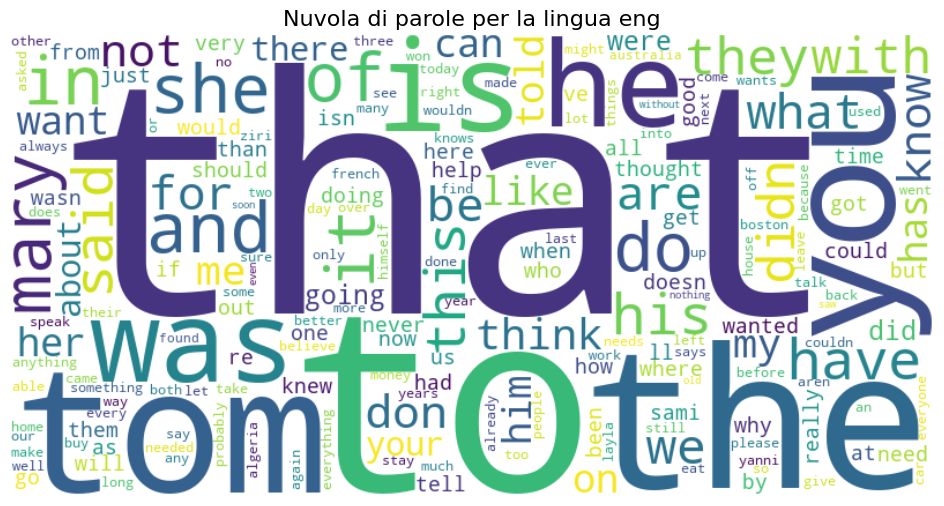

In [5]:
language_to_plot = 'eng'  # Usa il codice della lingua (es. 'eng', 'ita', ecc.)

if language_to_plot in tfidf_df.index:
    # Ottieni solo le colonne (evitando di includere l'indice)
    word_scores = tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    # Mostrare la nuvola di parole
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvola di parole per la lingua {language_to_plot}", fontsize=16)
    plt.show()
else:
    print(f"La lingua '{language_to_plot}' non è presente nel DataFrame.")


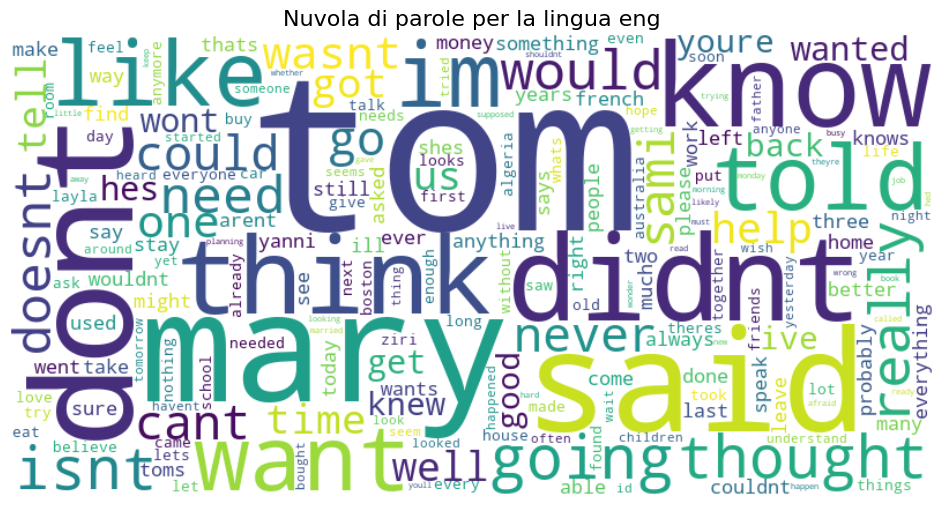

In [6]:
if language_to_plot in filtered_tfidf_df.index:
    # Ottieni solo le colonne (evitando di includere l'indice)
    word_scores = filtered_tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    # Mostrare la nuvola di parole
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvola di parole per la lingua {language_to_plot}", fontsize=16)
    plt.show()
else:
    print(f"La lingua '{language_to_plot}' non è presente nel DataFrame.")

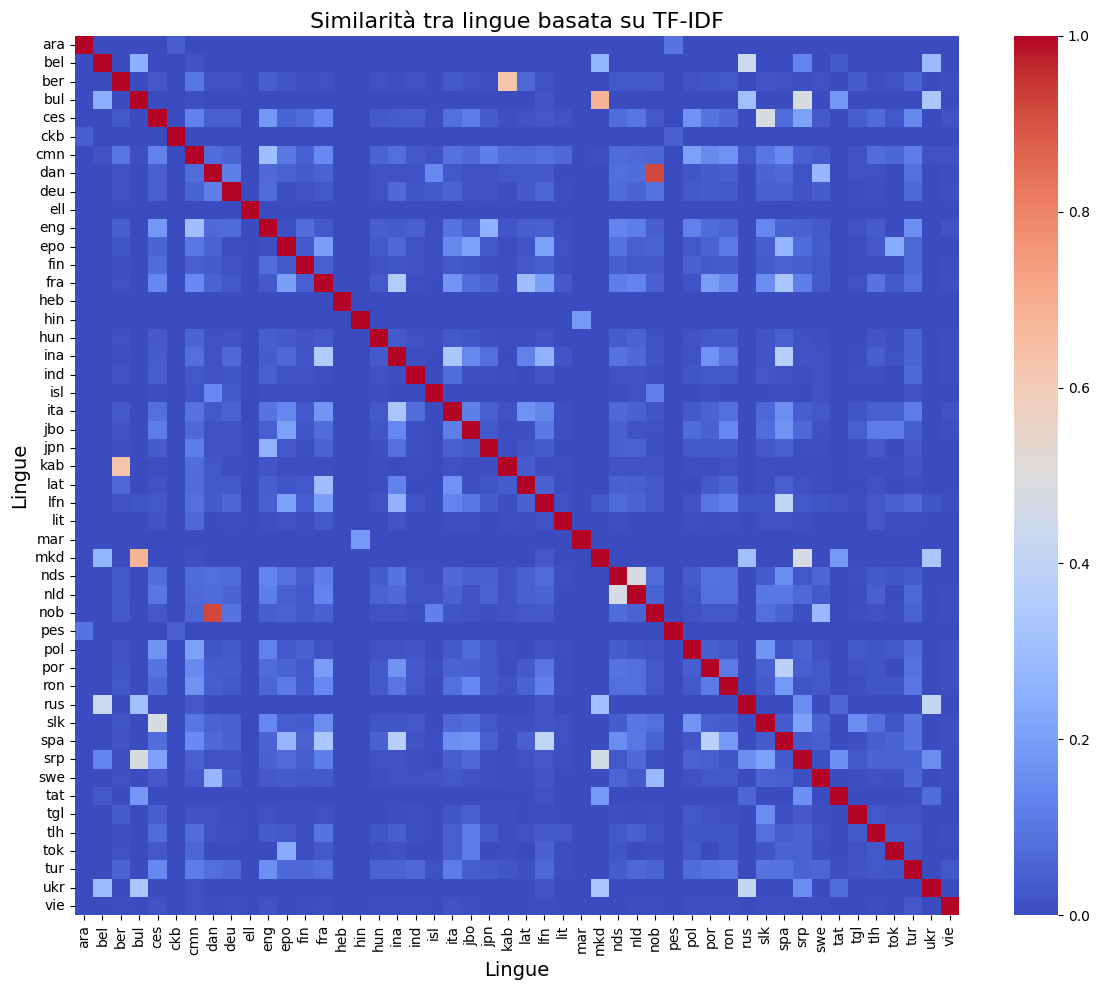

In [7]:
# Calcolare la similarità coseno tra le lingue
similarity_matrix = cosine_similarity(tfidf_df)

# Creare un DataFrame per la heatmap
similarity_df = pd.DataFrame(similarity_matrix, index=tfidf_df.index, columns=tfidf_df.index)

# Visualizzare la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Similarità tra lingue basata su TF-IDF", fontsize=16)
plt.xlabel("Lingue", fontsize=14)
plt.ylabel("Lingue", fontsize=14)
plt.tight_layout()
plt.show()


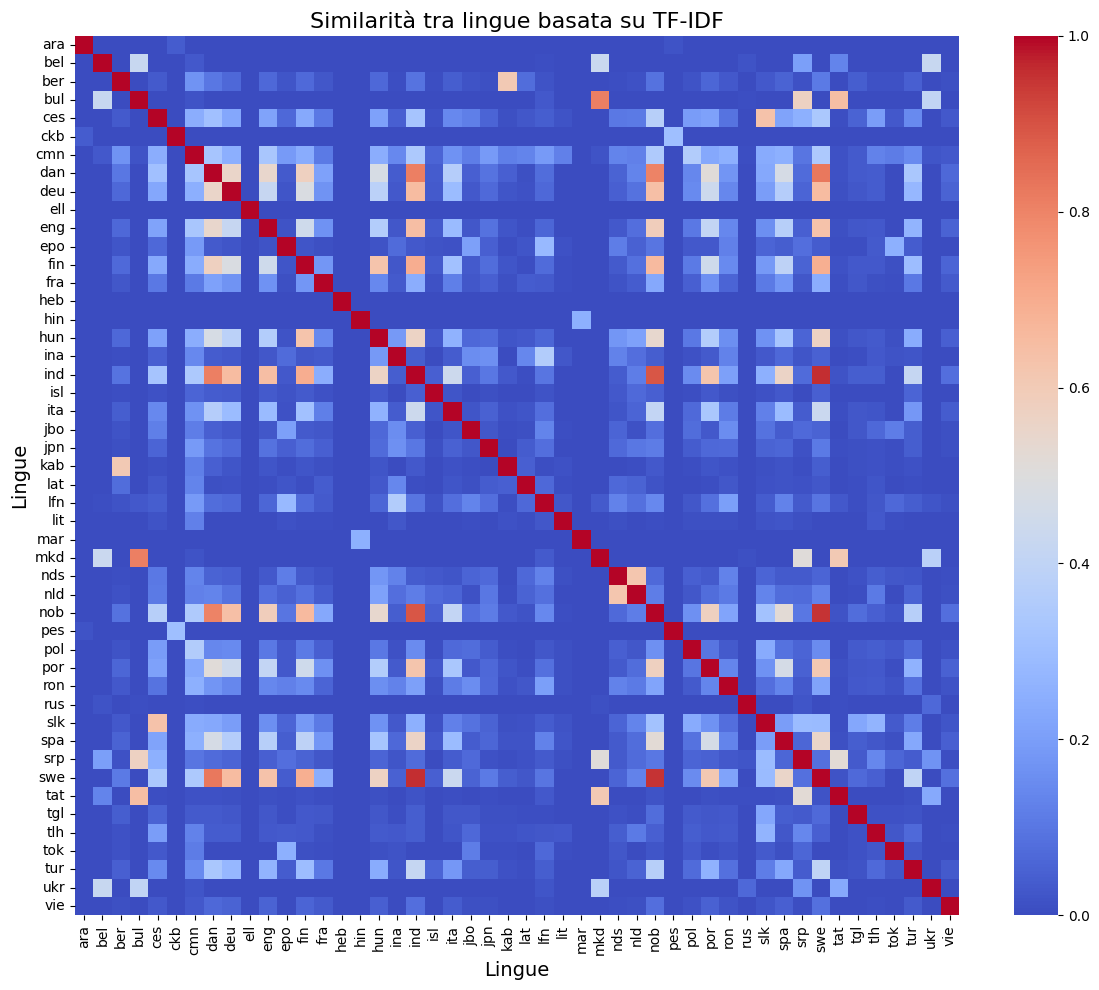

In [8]:
# Calcolare la similarità coseno tra le lingue
similarity_matrix = cosine_similarity(filtered_tfidf_df)

# Creare un DataFrame per la heatmap
similarity_df = pd.DataFrame(similarity_matrix, index=filtered_tfidf_df.index, columns=filtered_tfidf_df.index)

# Visualizzare la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Similarità tra lingue basata su TF-IDF", fontsize=16)
plt.xlabel("Lingue", fontsize=14)
plt.ylabel("Lingue", fontsize=14)
plt.tight_layout()
plt.show()

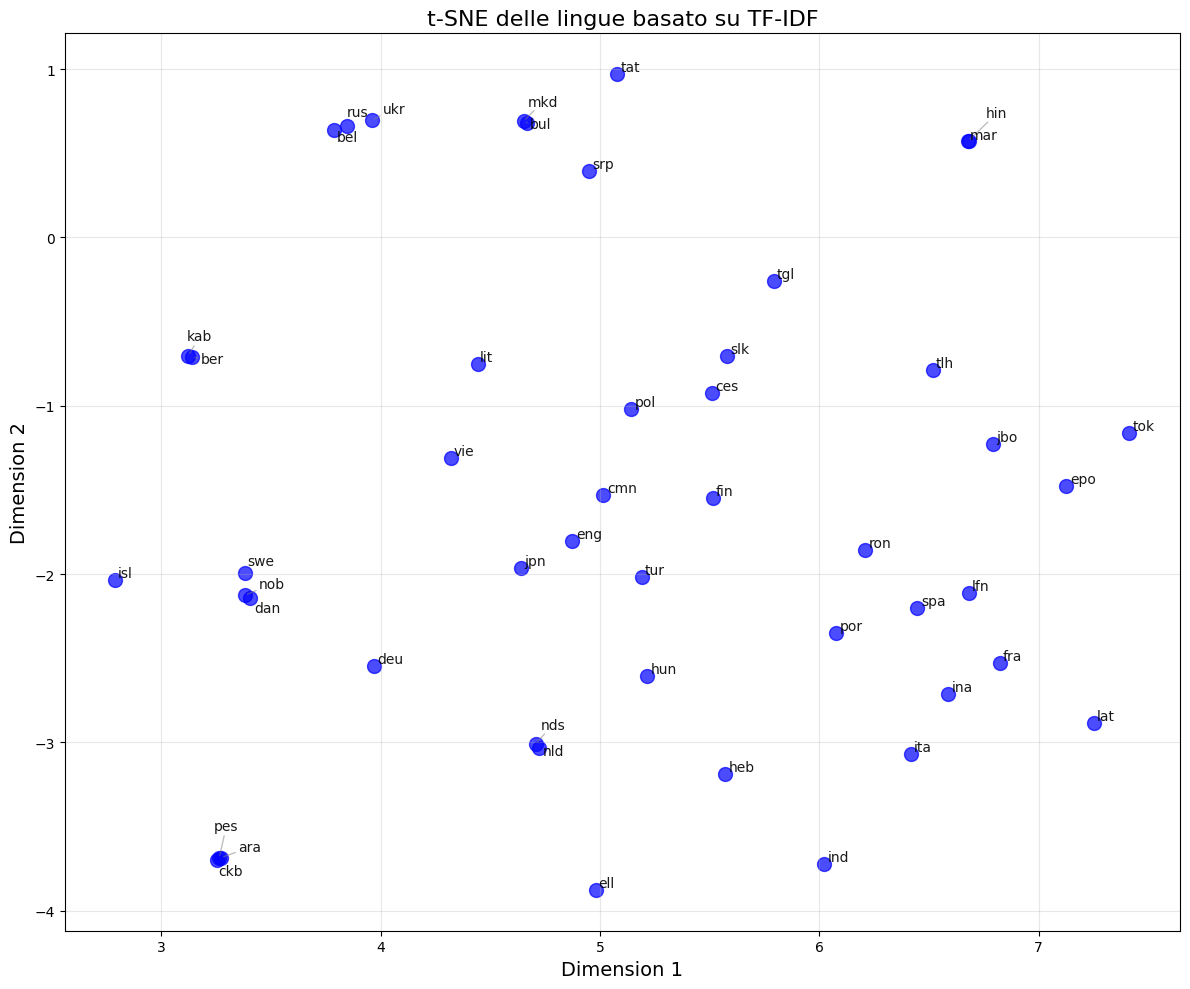

In [9]:
# Applicare t-SNE alla matrice TF-IDF
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df)

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = tfidf_df.index

# Creare il grafico scatter
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Aggiungere titoli e assi
plt.title("t-SNE delle lingue basato su TF-IDF", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


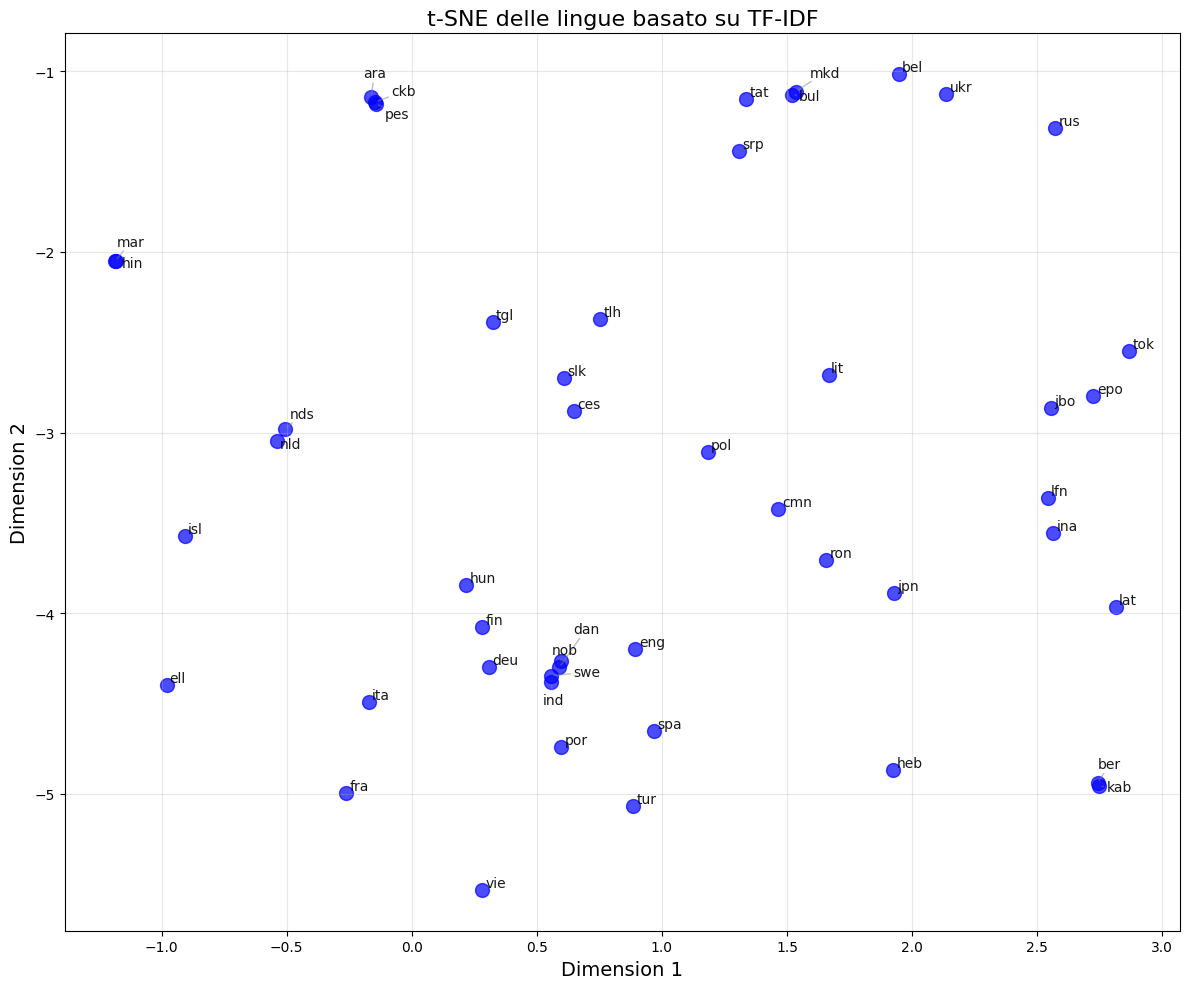

In [10]:
# Applicare t-SNE alla matrice TF-IDF
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df)

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = filtered_tfidf_df.index

# Creare il grafico scatter
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Aggiungere titoli e assi
plt.title("t-SNE delle lingue basato su TF-IDF", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


Best Silhouette Score with k=37: 0.0826


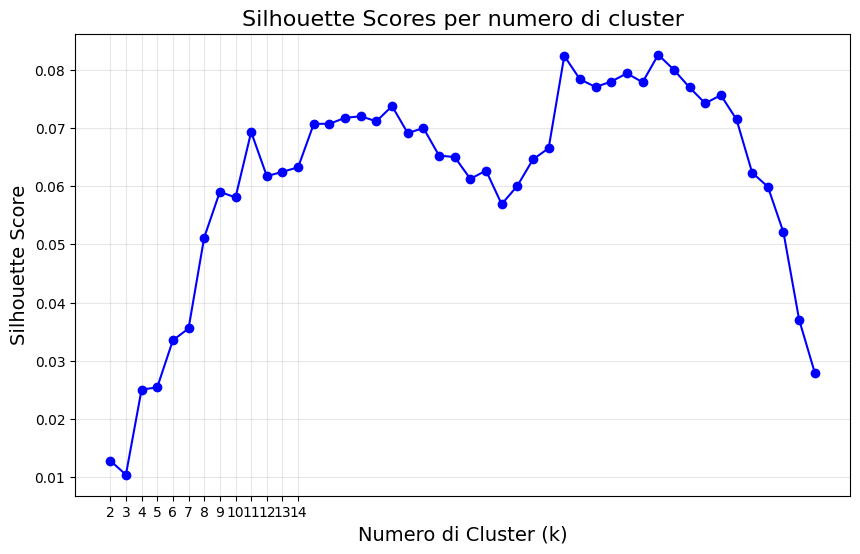

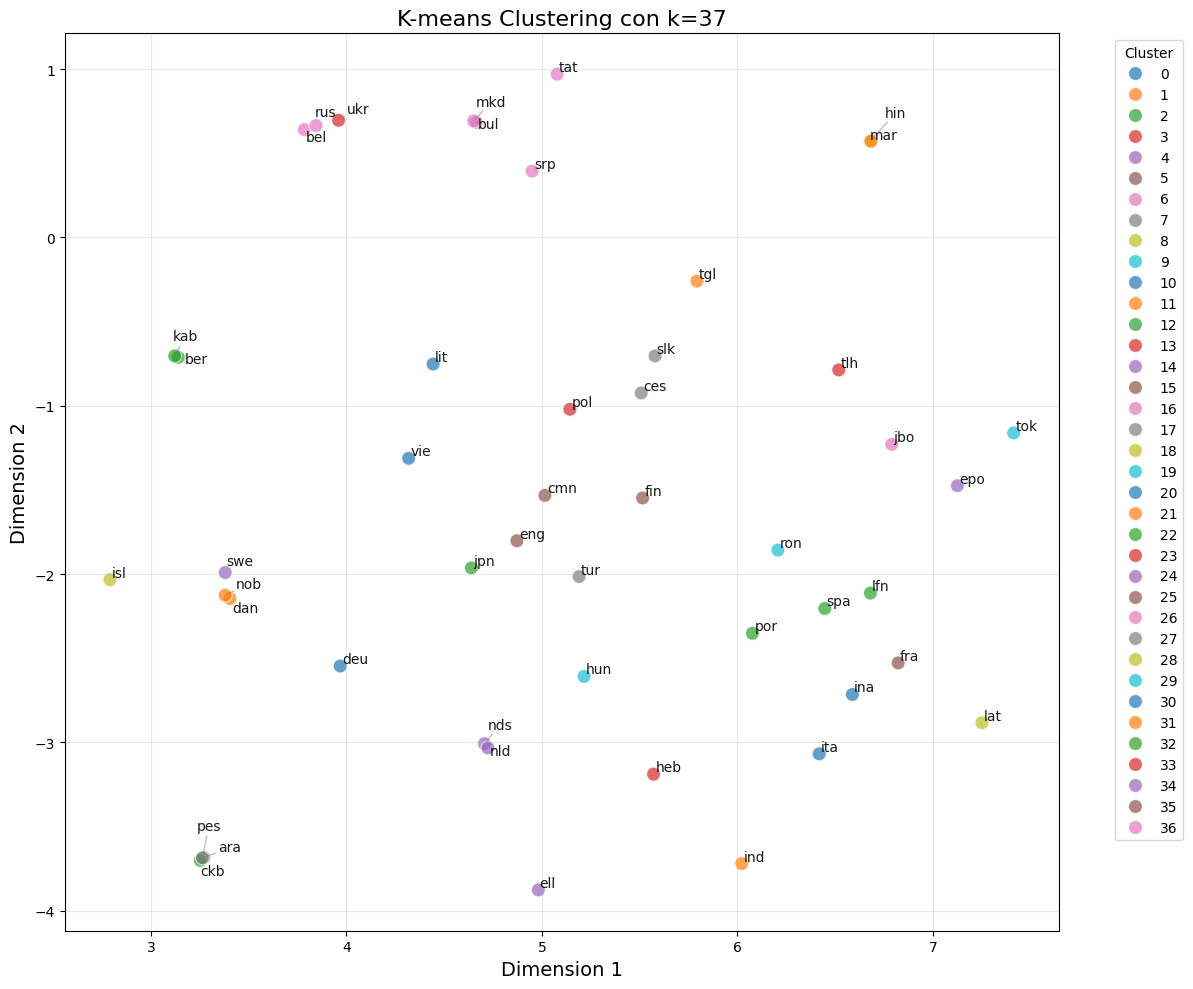

In [11]:
# Variabili per tracciare i migliori risultati
best_k = 0
best_sil_score = 0
silhouette_scores = []

# Cercare il miglior numero di cluster
for k in range(2, 48):
    # Calcolare K-means++
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(tfidf_df)

    # Calcolare il punteggio di silhouette per valutare il clustering
    sil_score = silhouette_score(tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    # Trovare il miglior punteggio
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

# Mostrare il miglior valore di k e il relativo Silhouette Score
print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

# Grafico dei Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Scores per numero di cluster", fontsize=16)
plt.xlabel("Numero di Cluster (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Clustering con il miglior numero di cluster
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(tfidf_df)

# Aggiungere i risultati del clustering al DataFrame
tfidf_df['Cluster'] = clusters

# Applicare t-SNE per ridurre la dimensionalità per la visualizzazione
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df.drop('Cluster', axis=1))  # Escludi la colonna 'Cluster' per t-SNE

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = tfidf_df.index

# Visualizzare i risultati con Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Titoli e dettagli
plt.title(f"K-means Clustering con k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


Best Silhouette Score with k=21: 0.1288


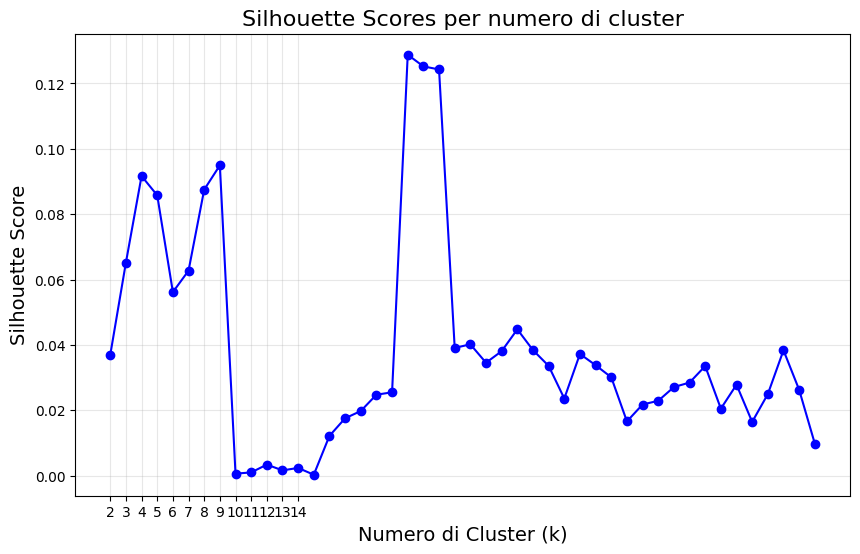

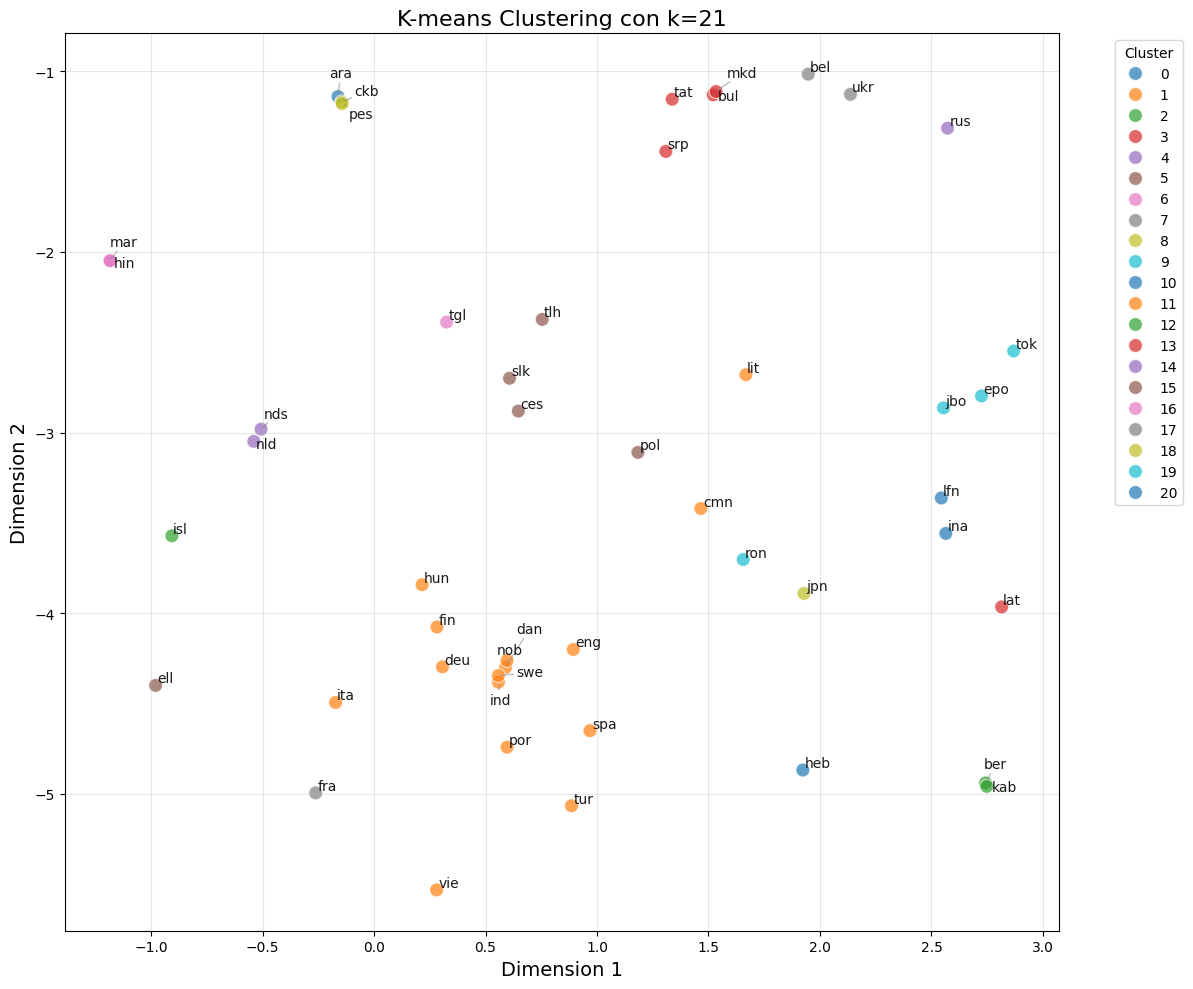

In [12]:
# Variabili per tracciare i migliori risultati
best_k = 0
best_sil_score = 0
silhouette_scores = []

# Cercare il miglior numero di cluster
for k in range(2, 48):
    # Calcolare K-means++
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(filtered_tfidf_df)

    # Calcolare il punteggio di silhouette per valutare il clustering
    sil_score = silhouette_score(filtered_tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    # Trovare il miglior punteggio
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

# Mostrare il miglior valore di k e il relativo Silhouette Score
print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

# Grafico dei Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Scores per numero di cluster", fontsize=16)
plt.xlabel("Numero di Cluster (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Clustering con il miglior numero di cluster
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(filtered_tfidf_df)

# Aggiungere i risultati del clustering al DataFrame
filtered_tfidf_df['Cluster'] = clusters

# Applicare t-SNE per ridurre la dimensionalità per la visualizzazione
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df.drop('Cluster', axis=1))  # Escludi la colonna 'Cluster' per t-SNE

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = filtered_tfidf_df.index

# Visualizzare i risultati con Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Titoli e dettagli
plt.title(f"K-means Clustering con k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


# Document Clustering

## Preprocessing phase

In [ ]:
file_path = "data/filtered_language_detection.csv"
data = pd.read_csv(file_path)

#Calcolare il totale delle righe
total_rows = len(data)

#Calcolare la frequenza delle lingue
language_counts = data['lan_code'].value_counts()

#Filtrare i codici lingua con frequenza >= 0.01% del totale
threshold = 0.01 * total_rows  # 0.1% del totale
valid_languages = language_counts[language_counts >= threshold].index

#Filtrare il dataset mantenendo solo le righe con i codici lingua validi
filtered_data = data[data['lan_code'].isin(valid_languages)]

#Salvare il nuovo dataset in un file CSV
output_path = 'data/doublefiltered_language_detection.csv'  # Sostituisci con il nome desiderato per il file
filtered_data.to_csv(output_path, index=False)


print(f"Nuovo file CSV salvato in: {output_path}")
print(f"Dimensione del nuovo dataset: {len(filtered_data)} righe (su {total_rows} totali).")
print(f"Number of valid languages: {len(valid_languages)}")

In [ ]:
# Caricamento del dataset
file_path = "data/doublefiltered_language_detection.csv"
df = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Calcola il numero minimo di frasi tra le lingue
min_documents = df.groupby('lan_code').size().min()
print(f"Numero minimo di documenti per lingua: {min_documents}")

# Campiona casualmente lo stesso numero di documenti per ogni lingua
balanced_df = df.groupby('lan_code').apply(lambda x: x.sample(n=min_documents, random_state=42)).reset_index(drop=True)

# Verifica il bilanciamento
balanced_counts = balanced_df.groupby('lan_code').size()
print("Conteggio dei documenti bilanciati per lingua:")
print(balanced_counts)

# Salva il dataset bilanciato in un file CSV (opzionale)
balanced_df.to_csv("data/balanced_language_dataset.csv", index=False)

In [ ]:
# Caricare il dataset
file_path = 'data/balanced_language_dataset.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Divisione in caratteristiche (X) e target (y)
X = data['sentence']
y = data['lan_code']

tfidf_vectorizer = TfidfVectorizer(lowercase=True)
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

Vectorizer ready


## Clustering

In [ ]:
# Clustering su dati ridotti
num_clusters = 200
kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Analisi dei risultati
data['cluster'] = clusters
# Converte il risultato in DataFrame
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# Calcolo del totale per ciascun cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# Unione con i dati originali per calcolare la frazione
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

# Calcolo della "homogeneity" stimata
homogeneity = grouped.groupby('cluster')['fraction'].max().mean()

# Risultati
print(f"Stima della Homogeneity: {homogeneity:.4f}")

grouped.to_csv("clustering_results.csv", index=False)

print("Risultato salvato in 'clustering_results.csv'.")

Stima della Homogeneity: 0.8456
Risultato salvato in 'clustering_results.csv'.


In [ ]:
# Dopo aver identificato best_clusters
data['cluster'] = clusters

# Raggruppa per cluster e lingua per calcolare le conte
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# Calcolo del totale per ciascun cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# Unione con i dati originali per calcolare la frazione
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

# Trova la lingua dominante per ciascun cluster
dominant_languages = grouped.loc[grouped.groupby('cluster')['fraction'].idxmax()][['cluster', 'lan_code', 'fraction']]

# Ordina per cluster e visualizza
dominant_languages = dominant_languages.sort_values(by='cluster')
print(dominant_languages)

# Salva i risultati in un file CSV (opzionale)
dominant_languages.to_csv("balanced_dominant_languages_per_cluster.csv", index=False)
print("I risultati delle lingue dominanti sono stati salvati in 'balanced_dominant_languages_per_cluster.csv'.")

     cluster lan_code  fraction
285        0      heb  1.000000
102        1      eng  0.999784
618        2      rus  0.544979
103        3      eng  0.872981
144        4      epo  0.992557
..       ...      ...       ...
617      195      por  1.000000
782      196      ukr  0.995253
301      197      heb  1.000000
235      198      fin  0.833558
101      199      deu  0.999687

[200 rows x 3 columns]
I risultati delle lingue dominanti sono stati salvati in 'balanced_dominant_languages_per_cluster.csv'.


C:\Users\saver\AppData\Local\Temp\ipykernel_13708\2787930670.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\saver\AppData\Local\Temp\ipykernel_13708\2787930670.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


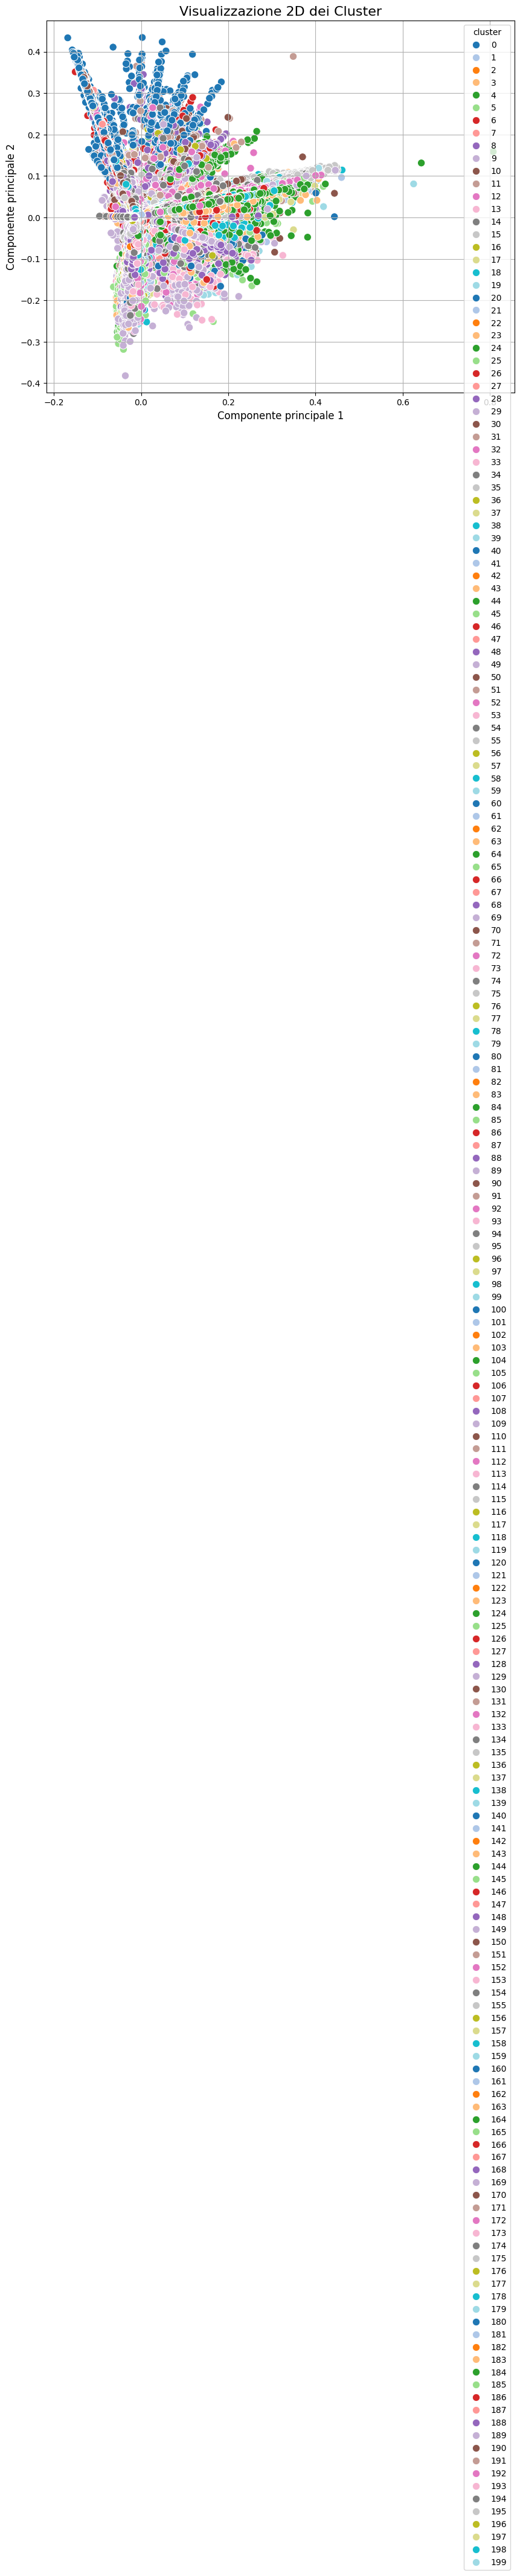

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Riduci la dimensionalità con PCA (o puoi usare t-SNE, UMAP, etc.)
pca = PCA(n_components=2, random_state=42)

reduced_matrix_2d = pca.fit_transform(X_tfidf)

# Visualizza i punti nel piano 2D, colorati per cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_matrix_2d[:, 0], y=reduced_matrix_2d[:, 1], hue=data['cluster'], palette="tab20", s=80, marker='o')

# Aggiungi titolo e etichette
plt.title('Visualizzazione 2D dei Cluster', fontsize=16)
plt.xlabel('Componente principale 1', fontsize=12)
plt.ylabel('Componente principale 2', fontsize=12)
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [ ]:
# Ora associamo a ciascun cluster la lingua dominante
cluster_to_language = {}
for cluster in data['cluster'].unique():
    # Trova la lingua prevalente per ciascun cluster
    most_common_language = data[data['cluster'] == cluster]['lan_code'].mode()[0]
    cluster_to_language[cluster] = most_common_language

print(cluster_to_language)

{188: 'jpn', 11: 'ber', 88: 'ber', 59: 'ber', 117: 'ber', 6: 'kab', 114: 'ber', 192: 'ber', 115: 'kab', 136: 'ber', 140: 'kab', 52: 'ber', 169: 'nld', 150: 'ber', 67: 'kab', 24: 'ber', 171: 'ber', 100: 'eng', 172: 'ber', 84: 'eng', 3: 'eng', 139: 'nld', 25: 'kab', 14: 'kab', 7: 'nld', 110: 'kab', 44: 'tur', 65: 'ita', 181: 'ita', 182: 'eng', 129: 'epo', 50: 'ber', 89: 'epo', 15: 'tur', 43: 'epo', 193: 'kab', 164: 'spa', 70: 'kab', 83: 'epo', 145: 'ita', 17: 'deu', 54: 'spa', 175: 'hun', 13: 'por', 20: 'fra', 157: 'epo', 167: 'spa', 176: 'fra', 61: 'deu', 174: 'spa', 78: 'eng', 119: 'por', 79: 'pol', 53: 'deu', 199: 'deu', 170: 'deu', 149: 'deu', 18: 'deu', 155: 'deu', 30: 'deu', 183: 'deu', 8: 'deu', 141: 'deu', 122: 'deu', 161: 'deu', 68: 'deu', 148: 'deu', 96: 'deu', 143: 'ita', 39: 'pol', 123: 'spa', 103: 'eng', 85: 'epo', 111: 'fin', 180: 'ita', 128: 'epo', 159: 'por', 16: 'fra', 91: 'fra', 46: 'spa', 179: 'eng', 116: 'ita', 1: 'eng', 94: 'eng', 166: 'eng', 58: 'tur', 12: 'eng', 81

In [ ]:
def predict_languages_for_phrases(phrases, vectorizer, kmeans):
    """
    Prevede le lingue per un batch di frasi.
    """
    # Trasforma le frasi in vettori
    vectors = vectorizer.transform(phrases)

    # Prevede i cluster per le frasi
    predicted_clusters = kmeans.predict(vectors)

    # Recupera le lingue associate ai cluster
    predicted_languages = [cluster_to_language[cluster] for cluster in predicted_clusters]
    return predicted_languages

In [ ]:
import csv
import random

accuracy = 0
n_rows = 0
sample_fraction = 0.2  # Percentuale di righe da utilizzare

# Carica le frasi e i codici lingua
with open('data/balanced_language_dataset.csv', encoding='utf-8') as csvfile:
    reader = list(csv.DictReader(csvfile))  # Converte il reader in una lista
    sampled_rows = random.sample(reader, int(len(reader) * sample_fraction))  # Campionamento

# Prepara batch di frasi e codici reali
sentences = [row['sentence'] for row in sampled_rows]
real_lan_codes = [row['lan_code'] for row in sampled_rows]

# Prevede le lingue per le frasi campionate
predicted_languages = predict_languages_for_phrases(sentences, tfidf_vectorizer, kmeans)

# Calcola l'accuratezza
for real, predicted in zip(real_lan_codes, predicted_languages):
    n_rows += 1
    if real == predicted:
        accuracy += 1

accuracy_percentage = (accuracy / n_rows) * 100 if n_rows > 0 else 0
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 59.40%


# Language classification

In [2]:
# Caricare il dataset
file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

In [3]:
# Divisione in caratteristiche (X) e target (y)
X = data['sentence']
y = data['lan_code']

# Generare la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # Puoi aumentare max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

# Divisione del dataset in training e test set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Vectorizer ready


In [4]:
# Allenare un modello di classificazione (Logistic Regression)
classifier = LogisticRegression(random_state=42, max_iter=100)  # Aumenta max_iter se necessario
classifier.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = classifier.predict(X_test)

# Valutazione del modello
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Salvare il modello in un file
joblib.dump(classifier, 'models/logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl' in models folder")

# Salvare anche il vettorizzatore TF-IDF
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl' in models folder")


c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         ara       0.99      0.81      0.89      7599
         bel       0.72      0.42      0.53      2500
         ber       0.89      0.83      0.86    118909
         bul       0.72      0.69      0.71      4922
         ces       0.86      0.77      0.81     12793
         ckb       1.00      0.67      0.80      2135
         cmn       0.21      0.00      0.00     14394
         dan       0.84      0.82      0.83     11160
         deu       0.99      0.99      0.99    116759
         ell       1.00      0.90      0.95      6935
         eng       0.99      0.99      0.99    317329
         epo       0.98      0.98      0.98    137848
         fin       0.94      0.87      0.90     27805
         fra       0.99      0.97      0.98    100167
         heb       1.00      0.92      0.96     39875
         hin       0.88      0.67      0.76      2865
         hun       0.98      0.89      0.93     71898
    

C:\Users\saver\AppData\Local\Temp\ipykernel_18584\864436643.py:22: UserWarning:

Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.

C:\Users\saver\AppData\Local\Temp\ipykernel_18584\864436643.py:22: UserWarning:

Matplotlib currently does not support Devanagari natively.

C:\Users\saver\AppData\Local\Temp\ipykernel_18584\864436643.py:22: UserWarning:

Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.

C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.

C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Matplotlib currently does not support Devanagari natively.

C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.



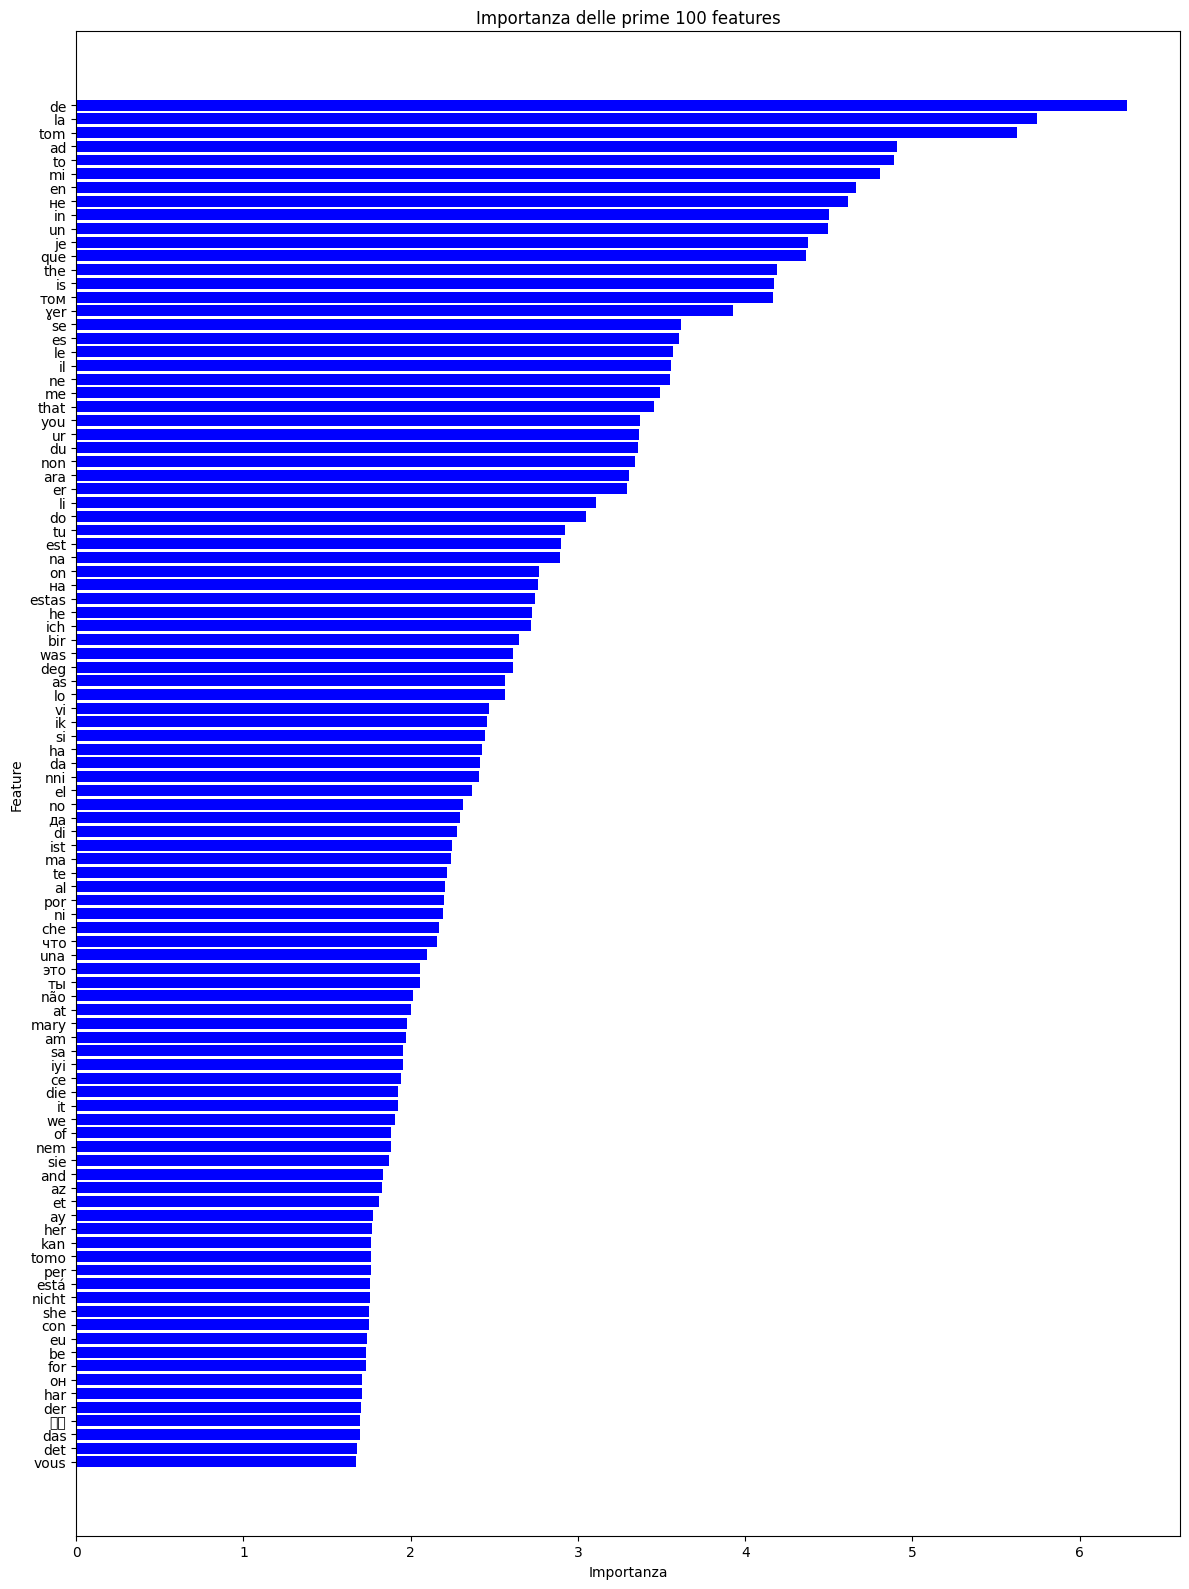

In [17]:
# Stampare le features utilizzate dal modello
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = np.abs(classifier.coef_).mean(axis=0)

# Ordina le features per importanza
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Prende i primi 100 feature e le loro importanze
top_n = 100
top_features = sorted_features[:top_n]
top_importances = sorted_importances[:top_n]

# Crea il grafico a barre
plt.figure(figsize=(12, 16))
plt.barh(range(top_n), top_importances[::-1], align='center', color='blue')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.title('Importanza delle prime 100 features')
plt.tight_layout()
plt.show()

In [6]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Assicurati che x e y corrispondano alle dimensioni della matrice conf_matrix
z = conf_matrix
x = list(classifier.classes_)  # Etichette delle colonne (lista)
y = list(classifier.classes_)  # Etichette delle righe (lista)

# Crea la heatmap con Plotly
fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Blues', showscale=True,
    annotation_text=z.astype(str).tolist(), font_colors=['black']  # annotation_text come lista
)

fig.update_layout(
    title_text='Confusion Matrix (All Classes)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickangle=45),
    autosize=True,
    height=1600,  # Altezza per gestire molte classi
    width=1600    # Larghezza per una buona leggibilità
)

fig.show()



## Language classification: using stopwords vs without stopword

In [7]:
# Leggi il file CSV
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Filtra per italiano, inglese e spagnolo
filtered_data = data[data['lan_code'].isin(['ita', 'eng', 'spa'])]

# Divisione in caratteristiche (X) e target (y)
X = filtered_data['sentence']
y = filtered_data['lan_code']

# Generare la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puoi aumentare max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

# Divisione del dataset in training e test set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Vectorizer ready


In [8]:
# Allenare un modello di classificazione (es. Random Forest)
classifier = LogisticRegression(max_iter=100, random_state=42)
classifier.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = classifier.predict(X_test)

# Valutazione del modello
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         eng       1.00      1.00      1.00    316643
         ita       0.99      1.00      0.99    161561
         spa       1.00      0.97      0.98     74110

    accuracy                           0.99    552314
   macro avg       0.99      0.99      0.99    552314
weighted avg       0.99      0.99      0.99    552314

Accuracy: 0.9946371086012666


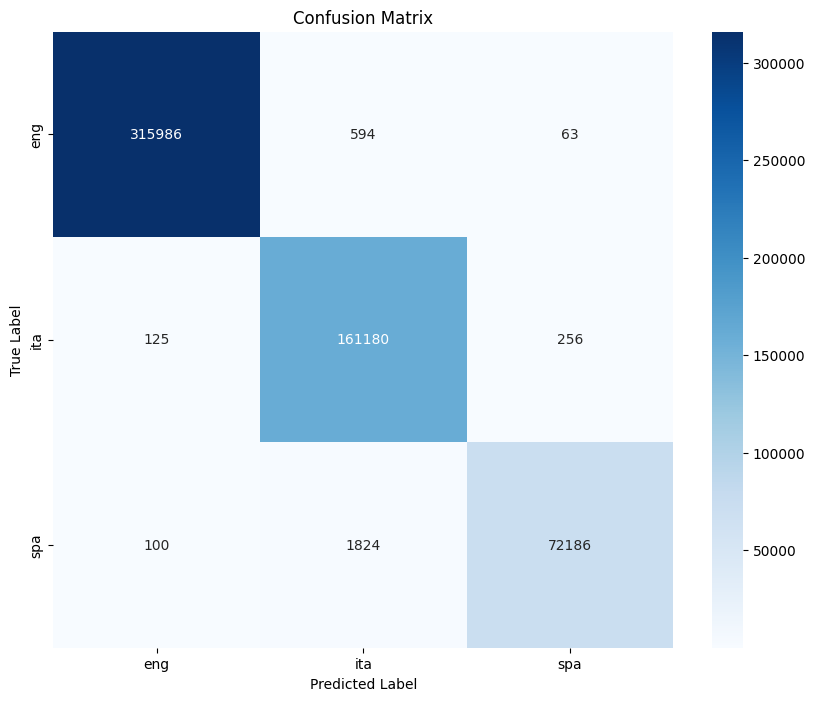

In [9]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Visualizza la confusion matrix come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classifier.classes_, 
            yticklabels=classifier.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Leggi il file CSV
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Funzione per rimuovere stop words e punteggiatura
def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  # Ottieni stop words per la lingua specifica
    except:
        stop_words = set()  # Se la lingua non è supportata, nessuna stop word viene usata
    # Tokenizzazione semplice e rimozione di stop words e punteggiatura
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Aggiungere un mapping tra codici lingua e le lingue supportate da NLTK
language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'spa': 'spanish'
}

# Applicare la rimozione delle stop words per ogni frase
data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], '')),
    axis=1
)

In [11]:
# Filtra per italiano, inglese e spagnolo
filtered_data = data[data['lan_code'].isin(['ita', 'eng', 'spa'])]

# Divisione in caratteristiche (X) e target (y)
X = filtered_data['cleaned_sentence']
y = filtered_data['lan_code']

# Generare la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  # Puoi aumentare max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

# Divisione del dataset in training e test set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Vectorizer ready


In [12]:
# Allenare un modello di classificazione (es. Random Forest)
classifier = LogisticRegression(max_iter=100, random_state=42)
classifier.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = classifier.predict(X_test)

# Valutazione del modello
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report:
              precision    recall  f1-score   support

         eng       0.99      0.91      0.95    316643
         ita       0.71      0.98      0.82    161561
         spa       0.96      0.49      0.65     74110

    accuracy                           0.87    552314
   macro avg       0.89      0.79      0.81    552314
weighted avg       0.90      0.87      0.87    552314

Accuracy: 0.8741657825077763


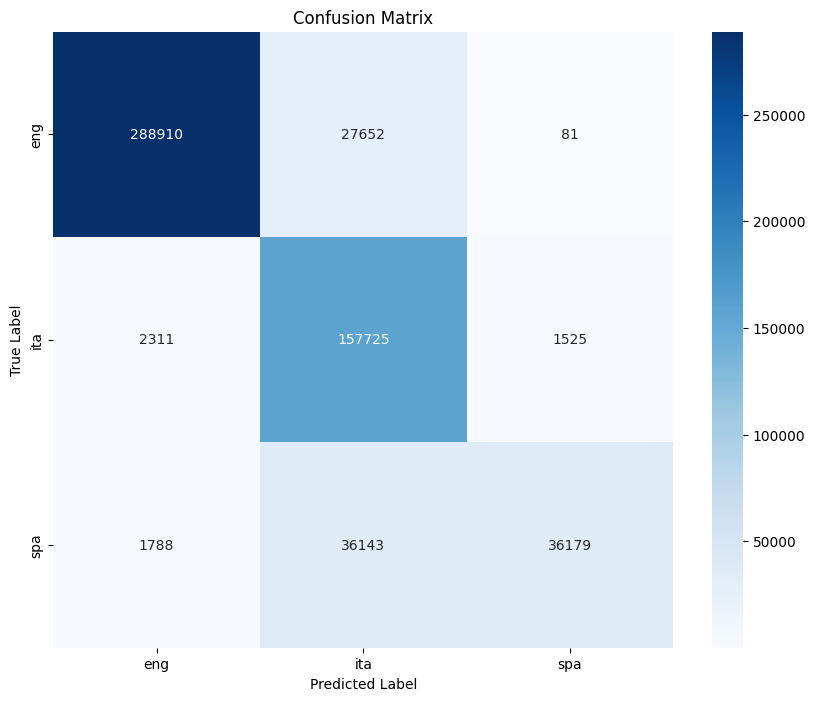

In [13]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Visualizza la confusion matrix come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classifier.classes_, 
            yticklabels=classifier.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Word2Vec

In [5]:
# Funzione per pulire e preprocessare il testo
def preprocess_text(text):
    # Rimuovi caratteri speciali, numeri e trasformazione in minuscolo
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    # Tokenizzazione
    tokens = word_tokenize(text)
    return tokens

In [36]:
# Caricare il dataset
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Applicare la pre-elaborazione
data['tokens'] = data['sentence'].apply(preprocess_text)

In [3]:
corpus = data['tokens'].tolist()

# Addestrare Word2Vec
model = Word2Vec(
    sentences=corpus,  # Il corpus tokenizzato
    vector_size=100,   # Dimensione degli embedding
    window=5,          # Dimensione del contesto
    min_count=15,       # Ignora parole che appaiono meno di 2 volte
    workers=4          # Numero di thread
)

# Salvare il modello per utilizzi futuri
model.save("multilingual_word2vec.model")

print("Modello Word2Vec addestrato e salvato.")

Modello Word2Vec addestrato e salvato.


In [2]:
model = Word2Vec.load("multilingual_word2vec.model")

In [11]:
similar_words = model.wv.most_similar('cat', topn=10)
print("Parole correlate a 'cat':", similar_words)

Parole correlate a 'cat': [('dog', 0.8875775337219238), ('boy', 0.8844391107559204), ('bird', 0.8587238788604736), ('horse', 0.8576750159263611), ('rabbit', 0.8512253761291504), ('squirrel', 0.8407779335975647), ('snake', 0.8374596834182739), ('puppy', 0.8349276185035706), ('child', 0.834084153175354), ('flower', 0.8293747901916504)]


In [88]:
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)
print("Risultato dell'analogia: king - man + woman =", analogy)

Risultato dell'analogia: king - man + woman = [('queen', 0.7993223071098328), ('princess', 0.7714136838912964), ('daughter', 0.738250732421875)]


In [60]:
# Ottenere i vettori di parole per le parole più frequenti
words = list(model.wv.index_to_key)[:1000]  # Considera le 1000 parole più comuni
word_vectors = model.wv[words]

# Ridurre dimensionalità con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_vectors = tsne.fit_transform(word_vectors)

# Creare un DataFrame per il grafico
tsne_df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
tsne_df['word'] = words

# Creare il grafico interattivo con Plotly
fig = px.scatter(tsne_df, x='x', y='y', text='word', title='Proiezione t-SNE dello spazio vettoriale')

# Personalizzare il layout per mostrare le etichette al passaggio del mouse
fig.update_traces(textposition='top center', marker=dict(size=8, opacity=0.8))
fig.update_layout(hovermode='closest', title_font_size=20)

# Mostrare il grafico
fig.show()

C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [66]:
# Scegliere un sottoinsieme di parole
words_subset = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']  # Scegli parole di lingue diverse
similarity_threshold = 0.5  # Imposta una soglia di similarità

# Creare un grafo
G = nx.Graph()
for word in words_subset:
    for similar_word, similarity in model.wv.most_similar(word, topn=10):
        if similarity > similarity_threshold:
            G.add_edge(word, similar_word, weight=similarity)

# Convertire il grafo in un formato compatibile con Pyvis
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
net.from_nx(G)

# Aggiungere tooltip per i nodi
for node in net.nodes:
    node['title'] = node['id']  # Mostra il nome della parola quando passi il mouse

# Configurare l'aspetto della rete
net.repulsion(
    node_distance=150,
    central_gravity=0.33,
    spring_length=100,
    spring_strength=0.10,
    damping=0.95,
)

# Salva e visualizza la rete
net.write_html("semantic_network.html")
webbrowser.open("semantic_network.html")

True

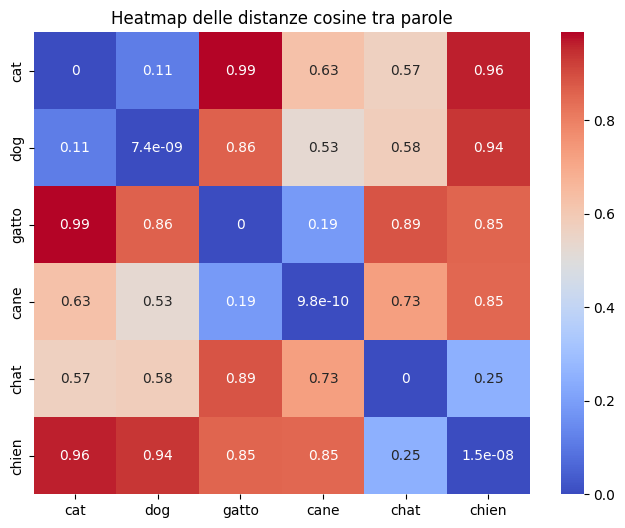

In [67]:
# Definire un elenco di parole di lingue diverse
words = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']
matrix = []

# Calcolare le distanze cosine tra tutte le parole
for word1 in words:
    row = []
    for word2 in words:
        dist = cosine(model.wv[word1], model.wv[word2])
        row.append(dist)
    matrix.append(row)

# Convertire in array numpy e creare una heatmap
matrix = np.array(matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap delle distanze cosine tra parole")
plt.show()

Risultato dell'analogia: king - man + woman = [('queen', 0.7993223667144775)]


C:\Users\valer\AppData\Local\Temp\ipykernel_26320\3622232979.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




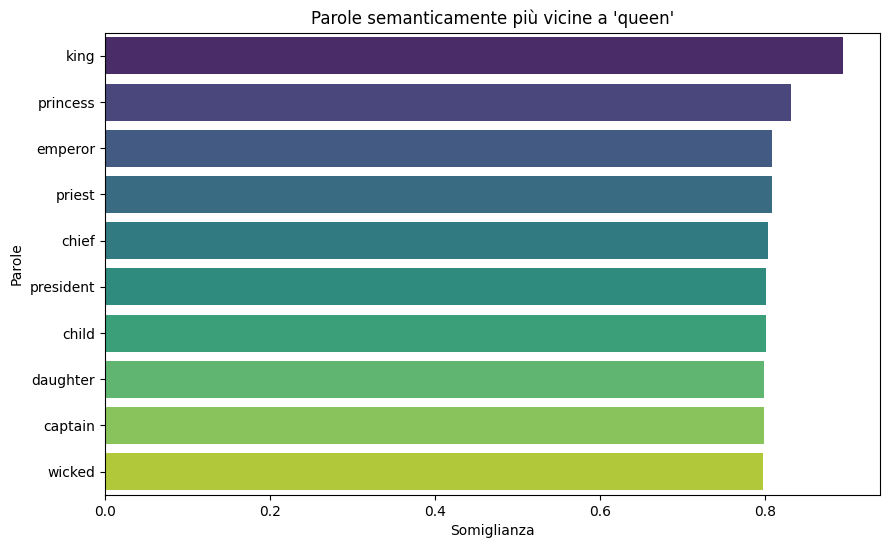

In [68]:
# Esempio di analogia
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Risultato dell'analogia: king - man + woman =", analogy)

# Visualizzazione (opzionale)
word = analogy[0][0]
similar_words = model.wv.most_similar(word, topn=10)

# Creare un barplot per visualizzare il risultato
similar_df = pd.DataFrame(similar_words, columns=['Word', 'Similarity'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity', y='Word', data=similar_df, palette='viridis')
plt.title(f"Parole semanticamente più vicine a '{word}'")
plt.xlabel("Somiglianza")
plt.ylabel("Parole")
plt.show()


# Document Clustering with Word2Vec

In [6]:
#funzione per calcolare la rappresentazione vettoriale di una frase
def sentence_vector(sentence, model):
    tokens = preprocess_text(sentence)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # Media dei vettori
    else:
        return np.zeros(model.vector_size)  # Ritorna un vettore nullo se nessuna parola è presente

In [ ]:
# Caricare il dataset
file_path = 'data/balanced_language_dataset.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Divisione in caratteristiche (X) e target (y)
X = data['sentence']
y = data['lan_code']

X_mean = X.apply(lambda x: sentence_vector(x, model))

X_mean = np.array(X_mean.tolist())

In [11]:
# Clustering su dati ridotti
num_clusters = 18
kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=42)
clusters = kmeans.fit_predict(X_mean)

# Analisi dei risultati
data['cluster'] = clusters
# Converte il risultato in DataFrame
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# Calcolo del totale per ciascun cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# Unione con i dati originali per calcolare la frazione
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

# Calcolo della "homogeneity" stimata
homogeneity = grouped.groupby('cluster')['fraction'].max().mean()

# Risultati
print(f"Stima della Homogeneity: {homogeneity:.4f}")

grouped.to_csv("w2v_clustering_results.csv", index=False)

print("Risultato salvato in 'w2v_clustering_results.csv'.")

Stima della Homogeneity: 0.8619
Risultato salvato in 'w2v_clustering_results.csv'.


In [12]:
# Dopo aver identificato best_clusters
data['cluster'] = clusters

# Raggruppa per cluster e lingua per calcolare le conte
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# Calcolo del totale per ciascun cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# Unione con i dati originali per calcolare la frazione
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

# Trova la lingua dominante per ciascun cluster
dominant_languages = grouped.loc[grouped.groupby('cluster')['fraction'].idxmax()][['cluster', 'lan_code', 'fraction']]

# Ordina per cluster e visualizza
dominant_languages = dominant_languages.sort_values(by='cluster')
print(dominant_languages)

# Salva i risultati in un file CSV (opzionale)
dominant_languages.to_csv("w2v_balanced_dominant_languages_per_cluster.csv", index=False)
print("I risultati delle lingue dominanti sono stati salvati in 'w2v_balanced_dominant_languages_per_cluster.csv'.")

     cluster lan_code  fraction
70         0      heb  1.000000
24         1      eng  0.956638
167        2      spa  0.944641
2          3      ber  0.595805
34         4      epo  0.976532
100        5      jpn  0.359200
17         6      deu  0.991155
163        7      rus  0.860521
123        8      nld  0.995887
64         9      fra  0.990232
153       10      por  0.987008
94        11      ita  0.991520
113       12      kab  0.575305
196       13      ukr  0.995770
189       14      tur  0.997094
85        15      hun  0.999333
56        16      fin  0.991608
87        17      hun  0.306617
I risultati delle lingue dominanti sono stati salvati in 'w2v_balanced_dominant_languages_per_cluster.csv'.


C:\Users\saver\AppData\Local\Temp\ipykernel_14364\3092863790.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


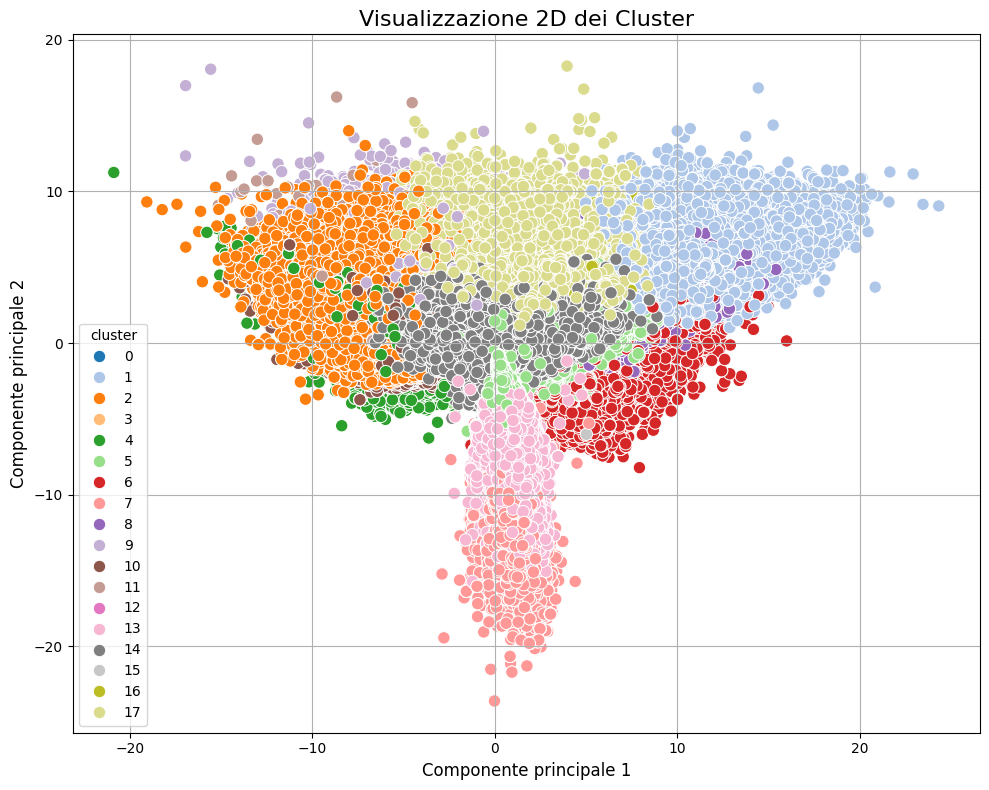

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Riduci la dimensionalità con PCA (o puoi usare t-SNE, UMAP, etc.)
pca = PCA(n_components=2, random_state=42)

reduced_matrix_2d = pca.fit_transform(X_mean)

# Visualizza i punti nel piano 2D, colorati per cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_matrix_2d[:, 0], y=reduced_matrix_2d[:, 1], hue=data['cluster'], palette="tab20", s=80, marker='o')

# Aggiungi titolo e etichette
plt.title('Visualizzazione 2D dei Cluster', fontsize=16)
plt.xlabel('Componente principale 1', fontsize=12)
plt.ylabel('Componente principale 2', fontsize=12)
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [14]:
# Ora associamo a ciascun cluster la lingua dominante
cluster_to_language = {}
for cluster in data['cluster'].unique():
    # Trova la lingua prevalente per ciascun cluster
    most_common_language = data[data['cluster'] == cluster]['lan_code'].mode()[0]
    cluster_to_language[cluster] = most_common_language

print(cluster_to_language)

{3: 'ber', 5: 'jpn', 12: 'kab', 17: 'hun', 11: 'ita', 1: 'eng', 4: 'epo', 14: 'tur', 2: 'spa', 6: 'deu', 9: 'fra', 8: 'nld', 15: 'hun', 16: 'fin', 10: 'por', 0: 'heb', 7: 'rus', 13: 'ukr'}


In [17]:
def predict_languages_for_phrases(phrases, model, kmeans):
    """
    Prevede le lingue per un batch di frasi.
    """
    # Trasforma le frasi in vettori
    vectors = [sentence_vector(x, model) for x in phrases]

    # Prevede i cluster per le frasi
    predicted_clusters = kmeans.predict(vectors)

    # Recupera le lingue associate ai cluster
    predicted_languages = [cluster_to_language[cluster] for cluster in predicted_clusters]
    return predicted_languages

In [18]:
import csv
import random

accuracy = 0
n_rows = 0
sample_fraction = 0.2  # Percentuale di righe da utilizzare

# Carica le frasi e i codici lingua
with open('data/balanced_language_dataset.csv', encoding='utf-8') as csvfile:
    reader = list(csv.DictReader(csvfile))  # Converte il reader in una lista
    sampled_rows = random.sample(reader, int(len(reader) * sample_fraction))  # Campionamento

# Prepara batch di frasi e codici reali
sentences = [row['sentence'] for row in sampled_rows]
real_lan_codes = [row['lan_code'] for row in sampled_rows]

# Prevede le lingue per le frasi campionate
predicted_languages = predict_languages_for_phrases(sentences, model, kmeans)

# Calcola l'accuratezza
for real, predicted in zip(real_lan_codes, predicted_languages):
    n_rows += 1
    if real == predicted:
        accuracy += 1

accuracy_percentage = (accuracy / n_rows) * 100 if n_rows > 0 else 0
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 81.82%


# LogReg with Word2Vec

In [5]:
#funzione per calcolare la rappresentazione vettoriale di una frase
def sentence_vector(sentence, model):
    tokens = preprocess_text(sentence)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # Media dei vettori
    else:
        return np.zeros(model.vector_size)  # Ritorna un vettore nullo se nessuna parola è presente

In [6]:
#calcolare i vettori delle frasi nel dataset
data['vector'] = data['sentence'].apply(lambda x: sentence_vector(x, model))

In [8]:
#preparare il dataset per il classificatore
X = np.array(data['vector'].tolist())  # Matrice dei vettori
y = data['lan_code']                  # Etichette delle lingue


In [9]:
#dividere il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)

(8033208, 100)


In [10]:
#addestrare un classificatore (Logistic Regression)
classifier = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')
classifier.fit(X_train, y_train)


c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [11]:
#valutare il modello
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9511428062114164
              precision    recall  f1-score   support

         ara       0.97      0.96      0.97      7730
         bel       0.92      0.68      0.78      2531
         ber       0.81      0.79      0.80    118244
         bul       0.83      0.66      0.73      4922
         ces       0.90      0.93      0.91     12776
         ckb       0.99      0.92      0.95      2130
         cmn       0.00      0.00      0.00     14488
         dan       0.82      0.94      0.88     10989
         deu       1.00      1.00      1.00    116935
         ell       1.00      0.98      0.99      6961
         eng       1.00      1.00      1.00    317324
         epo       1.00      1.00      1.00    137128
         fin       0.99      0.97      0.98     27818
         fra       0.99      0.99      0.99    100248
         heb       1.00      0.99      1.00     39841
         hin       0.87      0.82      0.85      2915
         hun       0.99      0.99      0.99     7156

In [12]:
#funzione per riconoscere la lingua di una frase data in input
def predict_language(sentence):
    vector = sentence_vector(sentence, model)
    predicted_language = classifier.predict([vector])
    return predicted_language[0]

#testare con una frase
test_sentence = "Bonjour tout le monde"
predicted_lang = predict_language(test_sentence)
print(f"La lingua predetta per la frase '{test_sentence}' è: {predicted_lang}")

La lingua predetta per la frase 'Bonjour tout le monde' è: fra


In [13]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Assicurati che x e y corrispondano alle dimensioni della matrice conf_matrix
z = conf_matrix
x = list(classifier.classes_)  # Etichette delle colonne (lista)
y = list(classifier.classes_)  # Etichette delle righe (lista)

# Crea la heatmap con Plotly
fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Blues', showscale=True,
    annotation_text=z.astype(str).tolist(), font_colors=['black']  # annotation_text come lista
)

fig.update_layout(
    title_text='Confusion Matrix (All Classes)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickangle=45),
    autosize=True,
    height=1600,  # Altezza per gestire molte classi
    width=1600    # Larghezza per una buona leggibilità
)

fig.show()

In [31]:
# Recupera i coefficienti dal modello
coefficients = classifier.coef_

# Se ci sono più classi, ci saranno più set di coefficienti (uno per classe)
# Per semplificare, si può calcolare la media assoluta dei coefficienti su tutte le classi
importance = np.mean(np.abs(coefficients), axis=0)

# Crea un DataFrame per un'analisi più leggibile (opzionale)
feature_importance = pd.DataFrame({
    'Feature': range(0,X_train.shape[1]),  # Sostituisci con i nomi delle feature
    'Importance': importance
})

# Ordina le feature per importanza decrescente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

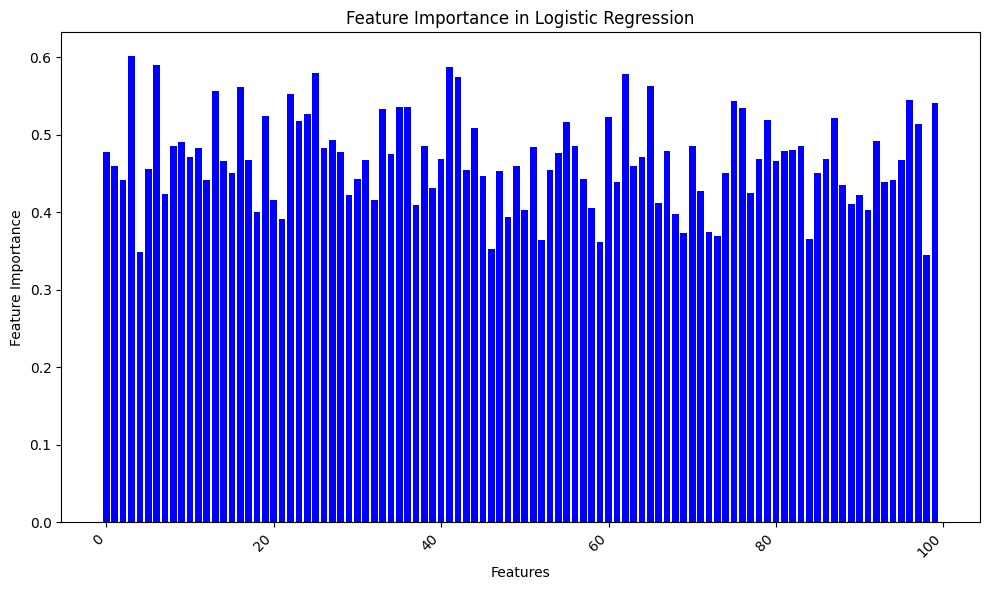

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xticks(rotation=45, ha='right')  # Ruota i nomi delle feature per leggibilità
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.show()
